In [49]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, FancyArrowPatch
import numpy as np
from qutip import destroy, qeye, sigmaz, tensor

# 1 emitter

In [160]:
N = 3

a = tensor(destroy(N), qeye(2))
sigm = tensor(qeye(N), destroy(2))
sigz = tensor(qeye(N), sigmaz())

wc = 5
wa = 5
g = 0.5

kappa = 0.05
gamma = 0.05
dephasing = 500e-6
c_ops = [
    np.sqrt(kappa) * a,
    np.sqrt(gamma) * sigm,
    # np.sqrt(dephasing) * sigz,
]

H = (
    wc * a.dag() * a
    + wa * sigm.dag() * sigm
    + g * (a.dag() * sigm + a * sigm.dag())
)

H_eff = H - 1j * kappa * a.dag() * a - 1j * gamma * sigm.dag() * sigm

H_eff.eigenenergies()

array([ 0.        +0.j  ,  4.5       -0.05j,  5.5       -0.05j,
        9.29289322-0.1j , 10.70710678-0.1j , 15.        -0.15j])

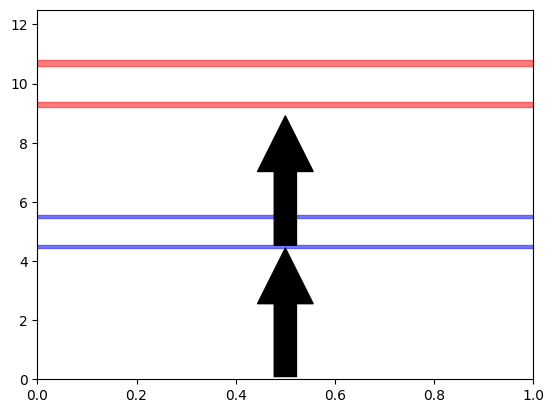

In [161]:
# N=1
fig, ax = plt.subplots()

for energy in H_eff.eigenenergies()[1:3]:
    center = np.real(energy)
    width = abs(np.imag(energy))
    rect = Rectangle((0, center - width), 1, 2*width, color='blue', alpha=0.5)
    ax.add_patch(rect)

for energy in H_eff.eigenenergies()[3:5]:
    center = np.real(energy)
    width = np.imag(energy)
    rect = Rectangle((0, center - width), 1, 2*width, color='red', alpha=0.5)
    ax.add_patch(rect)


polariton = np.real(H_eff.eigenenergies()[1])
arrow = FancyArrowPatch((0.5, -2e-3), (0.5, polariton+3e-2),
                                arrowstyle='simple', mutation_scale=80, color='black', lw=1)
ax.add_patch(arrow)
arrow = FancyArrowPatch((0.5, polariton-6e-2), (0.5, 2*polariton),
                                arrowstyle='simple', mutation_scale=80, color='black', lw=1)
ax.add_patch(arrow)

# ax.axhline(0, lw=1)
# ax.axhline(polariton, lw=1)
# ax.axhline(2*polariton, lw=1)

ax.set_ylim(0, 12.5)
# ax.set_ylim(4,5)
plt.show()

# 2 emitters

In [164]:
N = 3

a = tensor(destroy(N), qeye(2), qeye(2))
sigm1 = tensor(qeye(N), destroy(2), qeye(2))
sigm2 = tensor(qeye(N), qeye(2), destroy(2))
# sigz = tensor(qeye(N), sigmaz())

wc = 5
wa = 5
g = 0.5

kappa = 0.05
gamma = 0.05
# dephasing = 500e-6
c_ops = [
    np.sqrt(kappa) * a,
    np.sqrt(gamma) * sigm1,
    np.sqrt(gamma) * sigm2,
    # np.sqrt(dephasing) * sigz,
]

H = (
    wc * a.dag() * a
    + wa * sigm1.dag() * sigm1
    + wa * sigm2.dag() * sigm2
    + g * (a.dag() * sigm1 + a * sigm1.dag())
    + g * (a.dag() * sigm2 + a * sigm2.dag())
)

H_eff = H - 1j * kappa * a.dag() * a - 1j * gamma * sigm1.dag() * sigm1 - 1j * gamma * sigm2.dag() * sigm2

H_eff.eigenenergies()

array([ 0.        +0.j  ,  4.29289322-0.05j,  5.        -0.05j,
        5.70710678-0.05j,  8.77525513-0.1j , 10.        -0.1j ,
       10.        -0.1j , 11.22474487-0.1j , 14.        -0.15j,
       15.        -0.15j, 16.        -0.15j, 20.        -0.2j ])

8.77525512860841
9.999999999999984
10.0
11.224744871391591


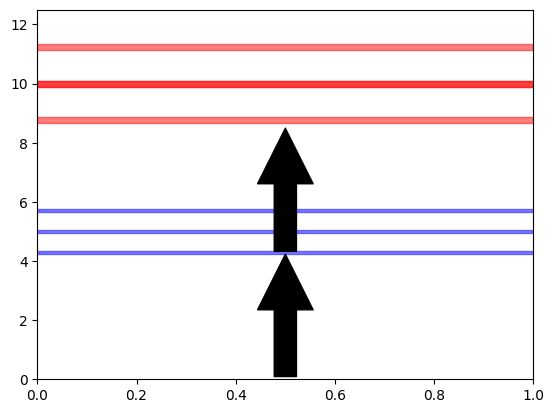

In [165]:
# N=2
fig, ax = plt.subplots()

for energy in H_eff.eigenenergies()[1:4]:
    center = np.real(energy)
    width = abs(np.imag(energy))
    rect = Rectangle((0, center - width), 1, 2*width, color='blue', alpha=0.5)
    ax.add_patch(rect)

for energy in H_eff.eigenenergies()[4:8]:
    center = np.real(energy)
    print(center)
    width = np.imag(energy)
    rect = Rectangle((0, center - width), 1, 2*width, color='red', alpha=0.5)
    ax.add_patch(rect)


polariton = np.real(H_eff.eigenenergies()[1])
arrow = FancyArrowPatch((0.5, -2e-3), (0.5, polariton+3e-2),
                                arrowstyle='simple', mutation_scale=80, color='black', lw=1)
ax.add_patch(arrow)
arrow = FancyArrowPatch((0.5, polariton-6e-2), (0.5, 2*polariton),
                                arrowstyle='simple', mutation_scale=80, color='black', lw=1)
ax.add_patch(arrow)

# ax.axhline(0, lw=1)
# ax.axhline(polariton, lw=1)
# ax.axhline(2*polariton, lw=1)

ax.set_ylim(0, 12.5)
plt.show()

# 3 emitters

In [166]:
N = 3

a = tensor(destroy(N), qeye(2), qeye(2), qeye(2))
sigm1 = tensor(qeye(N), destroy(2), qeye(2), qeye(2))
sigm2 = tensor(qeye(N), qeye(2), destroy(2), qeye(2))
sigm3 = tensor(qeye(N), qeye(2), qeye(2), destroy(2))
# sigz = tensor(qeye(N), sigmaz())

wc = 5
wa = 5
g = 0.5

kappa = 0.05
gamma = 0.05
# dephasing = 500e-6
c_ops = [
    np.sqrt(kappa) * a,
    np.sqrt(gamma) * sigm1,
    np.sqrt(gamma) * sigm2,
    np.sqrt(gamma) * sigm3,
    # np.sqrt(dephasing) * sigz,
]

H = (
    wc * a.dag() * a
    + wa * sigm1.dag() * sigm1
    + wa * sigm2.dag() * sigm2
    + wa * sigm3.dag() * sigm3
    + g * (a.dag() * sigm1 + a * sigm1.dag())
    + g * (a.dag() * sigm2 + a * sigm2.dag())
    + g * (a.dag() * sigm3 + a * sigm3.dag())
)

H_eff = H - 1j * kappa * a.dag() * a - 1j * gamma * sigm1.dag() * sigm1 - 1j * gamma * sigm2.dag() * sigm2 - 1j * gamma * sigm3.dag() * sigm3

H_eff.eigenenergies()

array([ 0.        +0.j  ,  4.1339746 -0.05j,  5.        -0.05j,
        5.        -0.05j,  5.8660254 -0.05j,  8.41886117-0.1j ,
        9.5       -0.1j ,  9.5       -0.1j , 10.        -0.1j ,
       10.5       -0.1j , 10.5       -0.1j , 11.58113883-0.1j ,
       13.3416876 -0.15j, 14.29289322-0.15j, 14.29289322-0.15j,
       15.        -0.15j, 15.70710678-0.15j, 15.70710678-0.15j,
       16.6583124 -0.15j, 18.77525513-0.2j , 20.        -0.2j ,
       20.        -0.2j , 21.22474487-0.2j , 25.        -0.25j])

8.418861169915816
9.499999999999996
9.500000000000012
10.0
10.499999999999996
10.500000000000014
11.581138830084187


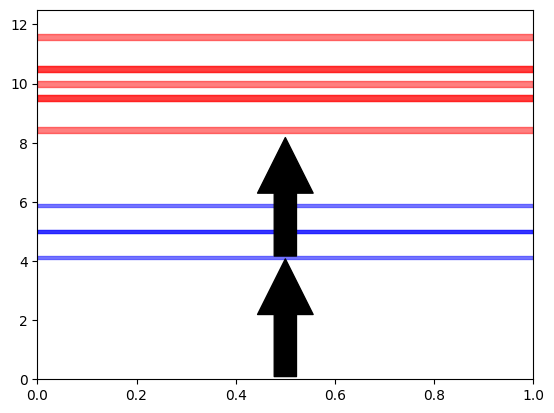

In [167]:
# N=3
fig, ax = plt.subplots()

for energy in H_eff.eigenenergies()[1:5]:
    center = np.real(energy)
    width = abs(np.imag(energy))
    rect = Rectangle((0, center - width), 1, 2*width, color='blue', alpha=0.5)
    ax.add_patch(rect)

for energy in H_eff.eigenenergies()[5:12]:
    center = np.real(energy)
    print(center)
    width = np.imag(energy)
    rect = Rectangle((0, center - width), 1, 2*width, color='red', alpha=0.5)
    ax.add_patch(rect)


polariton = np.real(H_eff.eigenenergies()[1])
arrow = FancyArrowPatch((0.5, -2e-3), (0.5, polariton+3e-2),
                                arrowstyle='simple', mutation_scale=80, color='black', lw=1)
ax.add_patch(arrow)
arrow = FancyArrowPatch((0.5, polariton-6e-2), (0.5, 2*polariton),
                                arrowstyle='simple', mutation_scale=80, color='black', lw=1)
ax.add_patch(arrow)

# ax.axhline(0, lw=1)
# ax.axhline(polariton, lw=1)
# ax.axhline(2*polariton, lw=1)

ax.set_ylim(0, 12.5)
plt.show()